## TP1 - Handwritten digit recognition using neural networks and convolutional neural networks

**M4108C/M4109C - INFOgr2D**

*03/2018*

### 1. Introduction

In this lab, we first design and observe the performance of fully connected neural networks (NNs) as well as convolutional neural networks (CNNs) for digit regconition.  
This lab uses the MNIST dataset and Keras implementation with Tensorflow backend.
Here are some useful links that may help you during the lab.

For NNs
- (https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/)
- (https://ankivil.com/mnist-database-and-simple-classification-networks/)

For CNNs
- (https://sefiks.com/2017/11/05/handwritten-digit-recognition-using-cnn-with-keras/)
- (http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/)


### 2. MNIST dataset

1) Load MNIST dataset and show its training and test sizes

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
# fix random seed for reproducibility
np.random.seed(7)


Using TensorFlow backend.


In [3]:
# load data
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [4]:
# show the training size, test size, number of class
print("train size : ",x_train.shape)
print("test size : ",x_test.shape)
print("train label : ",y_train.shape)
print("test label : ",y_test.shape)
nclass = len(np.unique(y_train))
print("number of classes:",nclass)

train size :  (60000, 28, 28)
test size :  (10000, 28, 28)
train label :  (60000,)
test label :  (10000,)
number of classes: 10


2) Display some image samples using matplotlib.pyplot

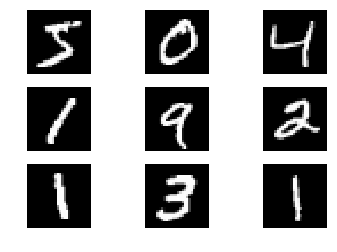

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# to complete
for i in range(0,9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray')); plt.axis('off')

3) (If necessary) Reduce the number of training images (for quick training and small-GPU computer)
 

In [6]:
#x_train = x_train[0:30000,:]
#y_train = y_train[0:30000]
print("train size : ",x_train.shape)
print("train label : ",y_train.shape)

train size :  (60000, 28, 28)
train label :  (60000,)


### 3. Fully-connected NNs 

1) Preprocess our data
- In order to perform fully-connected NNs, we need to first reshape the image (size of 28x28 pixels) to a 1D array (usingthe reshape function)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
print("train size : ",x_train.shape)
print("test size : ",x_test.shape)

train size :  (60000, 784)
test size :  (10000, 784)


- Convert the data to float and scale the values between 0 to 1
- Convert the labels from integer to categorical

In [9]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train, nclass)
y_test_cat = np_utils.to_categorical(y_test, nclass)
y_train_cat.shape

(60000, 10)

2) Define a 2-layer fully connected NN with 256 neurons for the 1st layer and 512 neurons for the 2nd layer. Use the 'sigmoid' activation function for the 2 network layers and 'softmax' for the final output layer. Show the model summary.

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop

# define the model
model_nn = Sequential()
model_nn.add(Dense(256, input_shape=(784,),activation='sigmoid'))
model_nn.add(Dense(512, activation='sigmoid'))
model_nn.add(Dense(10,activation='softmax')) #Last layer has nclass nodes
model_nn.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


3) Compile and train the model. Report the training time

In [13]:
import time
# compile the model
model_nn.compile(loss='categorical_crossentropy', optimizer =RMSprop(lr=0.001), metrics=["accuracy"])

# train the model
start_t_mod= time.time()
model_nn.fit(x_train, y_train_cat, batch_size=500, epochs = 20)
finish_t_mod = time.time()

time = finish_t_mod - start_t_mod
print("training time :", time)



Epoch 1/20
60000/60000 [==============================] - 3s - loss: 0.3378 - acc: 0.8997     
Epoch 2/20
60000/60000 [==============================] - 3s - loss: 0.3337 - acc: 0.9012     
Epoch 3/20
60000/60000 [==============================] - 3s - loss: 0.3323 - acc: 0.9018     
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.3302 - acc: 0.9019     
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.3282 - acc: 0.9043     
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.3276 - acc: 0.9033     
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.3266 - acc: 0.9035     
Epoch 8/20
60000/60000 [==============================] - 3s - loss: 0.3238 - acc: 0.9046     
Epoch 9/20
60000/60000 [==============================] - 3s - loss: 0.3232 - acc: 0.9057     
Epoch 10/20
60000/60000 [==============================] - 3s - loss: 0.3218 - acc: 0.9051     
Epoch 11/20
60000/60000 [========================

4) test the model

In [15]:
# test the model
# 
score = model_nn.evaluate(x_test, y_test_cat)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

 9984/10000 [============================>.] - ETA: 0sTest score: 0.290284365565
Test accuracy: 0.9137


### 4. CNNs

1) Now, start to design your first CNN (with one CONV layer followed by one MAX-POOLING + 1 FC layer). 
- CONV layer: 32 filters of size: 5x5, with padding, no stride (stride = 1), activation 'Relu'
- MAX-POOLING 2x2
- FC layer 128 nodes, activation Relu
- Output dense layer with activation 'softmax'
(Do not forget your activation function)
Report the performance. Show the number of parameters as well as computational time. 
    

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Activation, Flatten
import time

(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train_cat = np_utils.to_categorical(y_train, nclass)
y_test_cat = np_utils.to_categorical(y_test, nclass)

# design the model
model_cnn = Sequential()
model_cnn.add(Conv2D(32,(5,5),input_shape=(28,28,1), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dense(10,activation='softmax'))
model_cnn.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [27]:
# compile the model
model_cnn.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=RMSprop(lr=0.001))

# train the model
start_t= time.time()
model_cnn.fit(x_train, y_train_cat, batch_size=128, epochs=5)
finish_t = time.time()
time_cnn = finish_t - start_t
print("training time :", time_cnn)

Epoch 1/5
60000/60000 [==============================] - 34s - loss: 0.1945 - acc: 0.9400    
Epoch 2/5
60000/60000 [==============================] - 33s - loss: 0.0550 - acc: 0.9832    
Epoch 3/5
60000/60000 [==============================] - 34s - loss: 0.0370 - acc: 0.9883    
Epoch 4/5
60000/60000 [==============================] - 34s - loss: 0.0265 - acc: 0.9918    
Epoch 5/5
60000/60000 [==============================] - 34s - loss: 0.0201 - acc: 0.9939    
training time : 171.2156970500946


In [28]:
# test the model

score = model_cnn.evaluate(x_test, y_test_cat)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


10000/10000 [==============================] - 2s     
Test loss: 0.0337150562087
Test accuracy: 0.9892


4) Now, add one more CONV layer followed by on Max pooling. The number of filters and filter size to be chosen by yourself. 
Report the performance. Report the performance. Show the number of parameters as well as computational time. 
  

In [ ]:
# design new model
# design the model
model_cnn = Sequential()
model_cnn.add(Conv2D(32,(5,5),input_shape=(28,28,1), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(32,(5,5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dense(10,activation='softmax'))
model_cnn.summary()


# compile the model


# train the model



In [ ]:
# test the model



### 5. CNNs (advanced) 

Continue to design other CNNs by:
- adding more layers (conv layer, FC layer)? 
- using Batch normalization? 
- using Dropout? 
- sing Data augmentation?

Report the performance.

In [ ]:
# Batch normalization
from keras.layers import BatchNormalization

# Drop out
from keras.layers import Dropout

# design new model

